In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [ ]:
tf.random.set_seed(1234)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
FOLDER_NAME = 'atm_data_analysis'
DATASET_FILE_NAME = 'factTrans.csv' 
%cd /content/drive/My Drive/atm_data_analysis
# a_df=pd.read_csv(DATASET_FILE_NAME)
# a_df.info()



Mounted at /content/drive/
/content/drive/My Drive/atm_data_analysis


In [ ]:
# When we read csv, we change datetime format at that time
l_df = pd.read_csv(DATASET_FILE_NAME,parse_dates = ['TRANS_DATE'])
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6565 entries, 0 to 6564
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              6565 non-null   int64         
 1   BRANCH_ID                       6565 non-null   int64         
 2   TRANS_DATE                      6565 non-null   datetime64[ns]
 3   TYPE_OF_TRANSACTION             6565 non-null   object        
 4   DATEWISE_INFLOW_OUTFLOW_AMOUNT  6565 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 256.6+ KB


In [ ]:
# x= pd.to_datetime(a_df['TRANS_DATE'], format='%m/%d/%Y')
# a_df['TRANS_DATE_COV']=x.tolist()
# a_df

,ID,BRANCH_ID,TRANS_DATE,TYPE_OF_TRANSACTION,DATEWISE_INFLOW_OUTFLOW_AMOUNT,TRANS_DATE_COV
0,1,1,8/2/2018,INFLOW,114000.00,2018-08-02
1,2,1,8/2/2018,OUTFLOW,206152.00,2018-08-02
2,3,1,8/5/2018,INFLOW,121300.00,2018-08-05
3,4,1,8/5/2018,OUTFLOW,83300.00,2018-08-05
4,5,1,8/6/2018,INFLOW,20000.34,2018-08-06
...,...,...,...,...,...,...
6560,6561,4,7/18/2022,INFLOW,1000.00,2022-07-18
6561,6562,4,7/18/2022,OUTFLOW,513942.00,2022-07-18
6562,6563,4,7/19/2022,OUTFLOW,117641.00,2022-07-19
6563,6564,4,7/20/2022,INFLOW,2500.00,2022-07-20


In [ ]:
l_df

,ID,BRANCH_ID,TRANS_DATE,TYPE_OF_TRANSACTION,DATEWISE_INFLOW_OUTFLOW_AMOUNT
0,1,1,2018-08-02,INFLOW,114000.00
1,2,1,2018-08-02,OUTFLOW,206152.00
2,3,1,2018-08-05,INFLOW,121300.00
3,4,1,2018-08-05,OUTFLOW,83300.00
4,5,1,2018-08-06,INFLOW,20000.34
...,...,...,...,...,...
6560,6561,4,2022-07-18,INFLOW,1000.00
6561,6562,4,2022-07-18,OUTFLOW,513942.00
6562,6563,4,2022-07-19,OUTFLOW,117641.00
6563,6564,4,2022-07-20,INFLOW,2500.00


In [ ]:
df_outflow = l_df[l_df['TYPE_OF_TRANSACTION'] == 'OUTFLOW']
df_outflow_b1 = df_outflow[df_outflow['BRANCH_ID'] == 1]
df_outflow_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 1 to 1791
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              953 non-null    int64         
 1   BRANCH_ID                       953 non-null    int64         
 2   TRANS_DATE                      953 non-null    datetime64[ns]
 3   TYPE_OF_TRANSACTION             953 non-null    object        
 4   DATEWISE_INFLOW_OUTFLOW_AMOUNT  953 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 44.7+ KB


In [ ]:
# df_outflow_b1['month'] = df_outflow_b1['TRANS_DATE'].dt.month
# df_outflow_b1['month'] 

1       8
3       8
5       8
7       8
9       8
       ..
1785    7
1787    7
1789    7
1790    7
1791    7
Name: month, Length: 953, dtype: int64

In [ ]:
# # Define a function to draw time_series plot
# def timeseries (x_axis, y_axis, x_label):
#     plt.figure(figsize = (10, 6))
#     plt.plot(x_axis, y_axis, color ='black')
#     plt.xlabel(x_label, {'fontsize': 12}) 
#     plt.ylabel('Cash Flow ',{'fontsize': 12})

# simplify_df = df_outflow_b1.drop(['ID', 'BRANCH_ID','TYPE_OF_TRANSACTION','month'], axis=1)
# simplify_df
# dataset = simplify_df.copy()
# timeseries(df_outflow_b1.TRANS_DATE, dataset['DATEWISE_INFLOW_OUTFLOW_AMOUNT'], 'Time (day)')
# # print(dataset)
# # dataset['month'] = dataset.TRANS_DATE.dt.month
# # dataset['month'] = df_outflow_b1['TRANS_DATE'].dt.month
# dataset.TRANS_DATE = pd.to_datetime(dataset.TRANS_DATE)
# print(dataset)
# dataset_by_month = dataset.resample('M').sum()
# timeseries(dataset_by_month.TRANS_DATE, dataset_by_month['DATEWISE_INFLOW_OUTFLOW_AMOUNT'], 
#            'Time(month)')

# # dataset['year'] = dataset.TRANS_DATE.dt.year
# dataset_by_year = dataset.resample('Y').sum()
# timeseries(dataset_by_year.TRANS_DATE, dataset_by_year['DATEWISE_INFLOW_OUTFLOW_AMOUNT'], 
#            'Time (month)')

In [ ]:
df_outflow_b1
normalized_df_outflow_b1 = df_outflow_b1.drop(['ID', 'BRANCH_ID','TYPE_OF_TRANSACTION'], axis=1)
normalized_df_outflow_b1

,TRANS_DATE,DATEWISE_INFLOW_OUTFLOW_AMOUNT
1,2018-08-02,206152.00
3,2018-08-05,83300.00
5,2018-08-06,167140.34
7,2018-08-07,9440000.00
9,2018-08-08,394420.00
...,...,...
1785,2022-07-14,30800.00
1787,2022-07-17,73640.00
1789,2022-07-18,3760.00
1790,2022-07-19,13000.00


In [ ]:
# def timeseries (x_axis, y_axis, x_label):
#     plt.figure(figsize = (10, 6))
#     plt.plot(x_axis, y_axis, color ='black')
#     plt.xlabel(x_label, {'fontsize': 12}) 
#     plt.ylabel('Cash Flow ',{'fontsize': 12})
# dataset = normalized_df_outflow_b1.copy()
# timeseries(normalized_df_outflow_b1.TRANS_DATE, dataset['DATEWISE_INFLOW_OUTFLOW_AMOUNT'], 'Time (day)')
# # print(dataset)
# dataset['month'] = dataset.TRANS_DATE.dt.month
# # dataset['month'] = df_outflow_b1['TRANS_DATE'].dt.month
# dataset_by_month = dataset.resample('M').sum()
# timeseries(dataset_by_month.TRANS_DATE, dataset_by_month['DATEWISE_INFLOW_OUTFLOW_AMOUNT'], 
#            'Time(month)')

# dataset['year'] = dataset.TRANS_DATE.dt.year
# dataset_by_year = dataset.resample('Y').sum()
# timeseries(dataset_by_year.TRANS_DATE, dataset_by_year['DATEWISE_INFLOW_OUTFLOW_AMOUNT'], 
#            'Time (month)')

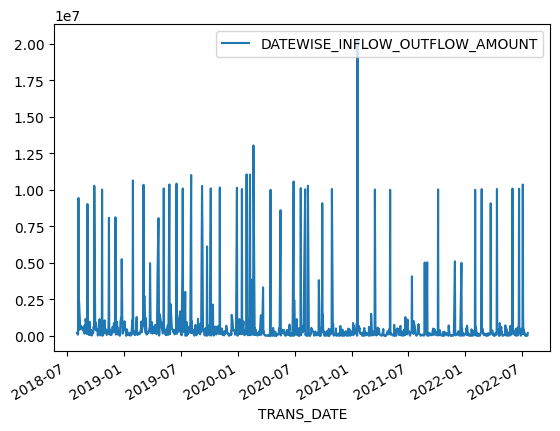

In [ ]:
normalized_df_outflow_b1['TRANS_DATE'] = pd.to_datetime(normalized_df_outflow_b1['TRANS_DATE'])
normalized_df_outflow_b1.set_index('TRANS_DATE', inplace=True)

normalized_df_outflow_b1.plot()
plt.show()

In [ ]:
# normalized_df_outflow_b1['TRANS_DATE'] = pd.to_datetime(normalized_df_outflow_b1['TRANS_DATE'])
# normalized_df_outflow_b1.set_index('TRANS_DATE', inplace=True)

# monthly_df = normalized_df_outflow_b1.resample('M').sum()

# monthly_df.plot()
# plt.show()

In [ ]:
# Split train data and test data
train_size = int(len(normalized_df_outflow_b1)*0.8)

train_data = normalized_df_outflow_b1.iloc[:train_size]
test_data = normalized_df_outflow_b1.iloc[train_size:]
train_data

,DATEWISE_INFLOW_OUTFLOW_AMOUNT
TRANS_DATE,
2018-08-02,206152.00
2018-08-05,83300.00
2018-08-06,167140.34
2018-08-07,9440000.00
2018-08-08,394420.00
...,...
2021-10-05,10035000.00
2021-10-06,38902.00
2021-10-07,38255.00


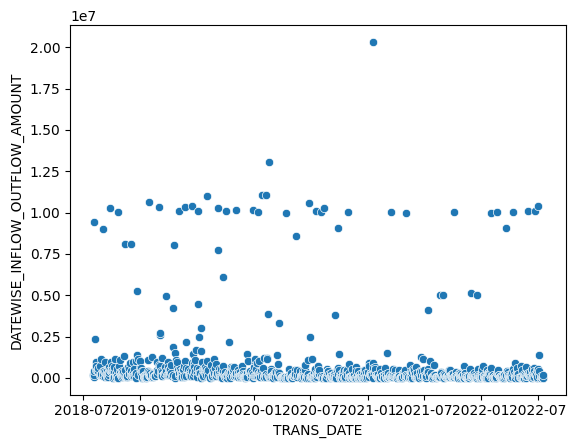

In [ ]:
import seaborn as sns
sns.scatterplot(data = normalized_df_outflow_b1, x = "TRANS_DATE", y = "DATEWISE_INFLOW_OUTFLOW_AMOUNT")

plt.show()

In [ ]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [ ]:
# test_scaled

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Different Type of Fit Scalers
from sklearn.preprocessing import StandardScaler
scalers = {}
for x in train_data.columns:
  scalers[x] = StandardScaler().fit(train_data[x].values.reshape(-1, 1))

In [ ]:
# Transform data via scalers
norm_df = train_data.copy()
for i, key in enumerate(scalers.keys()):
  norm = scalers[key].transform(norm_df.iloc[:, i].values.reshape(-1, 1))
  norm_df.iloc[:, i] = norm

In [ ]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 30
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)

In [ ]:
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (732, 30, 1)
y_train.shape:  (732, 1)
X_test.shape:  (161, 30, 1)
y_test.shape:  (161, 1)


In [ ]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)

In [ ]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_gru = create_gru(64)

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
    
history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
37/37 [==============================] - 9s 62ms/step - loss: 0.0134 - val_loss: 0.0057
Epoch 2/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0134 - val_loss: 0.0057
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0134 - val_loss: 0.0057
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0132 - val_loss: 0.0057
Epoch 5/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0133 - val_loss: 0.0057
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0132 - val_loss: 0.0057
Epoch 7/100
37/37 [==============================] - 3s 87ms/step - loss: 0.0133 - val_loss: 0.0057
Epoch 8/100
37/37 [==============================] - 3s 77ms/step - loss: 0.0133 - val_loss: 0.0057
Epoch 9/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0134 - val_loss: 0.0057
Epoch 10/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0133 - val_loss: 0.0057

In [ ]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

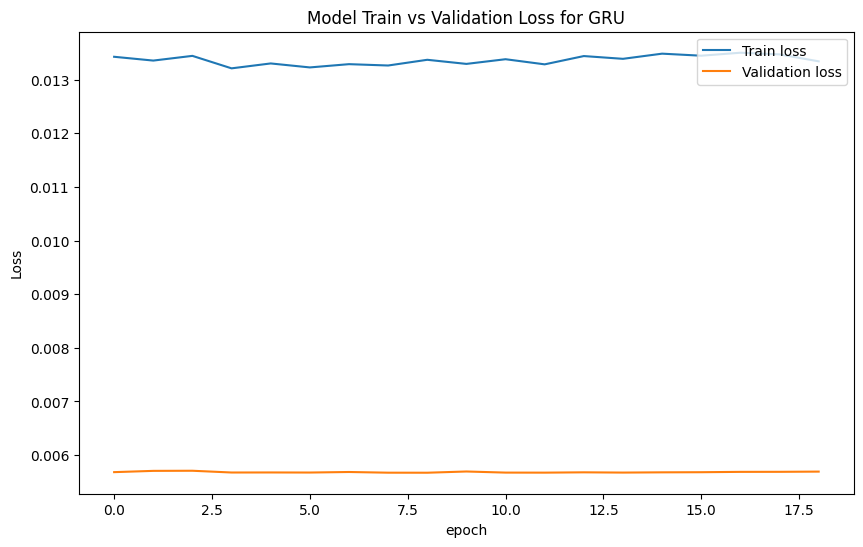

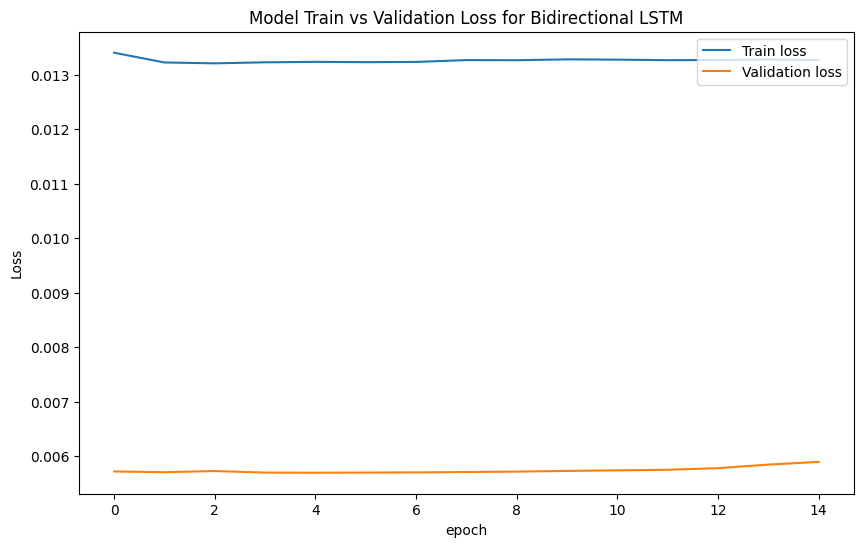

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

In [ ]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

6/6 [==============================] - 2s 17ms/step


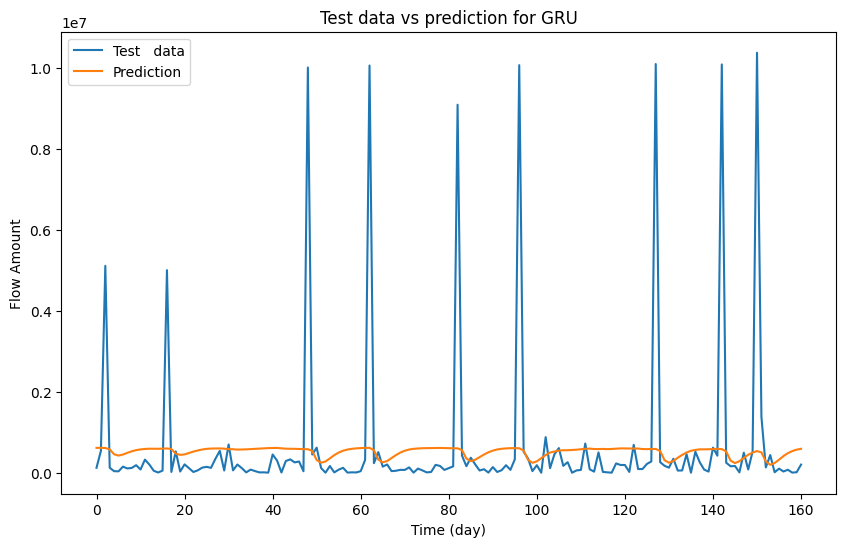

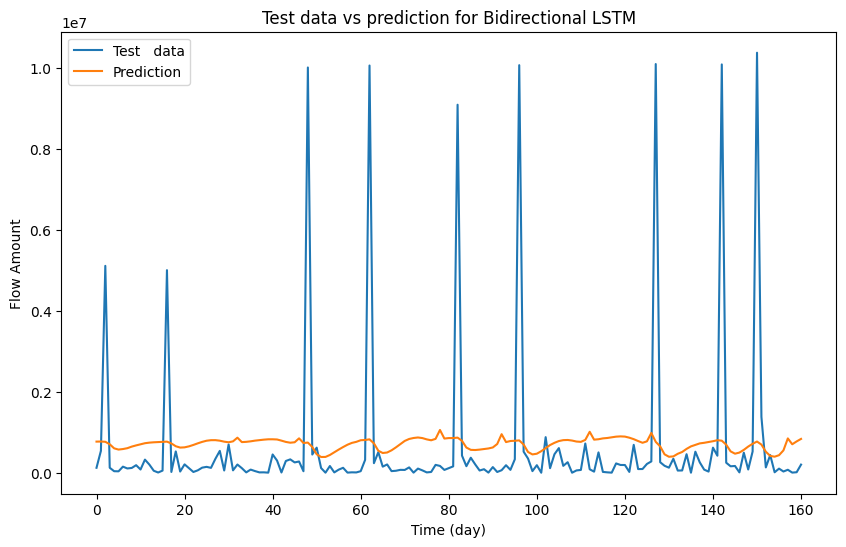

In [ ]:
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Flow Amount')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions-actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Square Error: {:.4f}'.format(mse))
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print(' ______________________________ ')
evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectiona LSTM')

GRU:
Mean Square Error: 4227889873728.5234
Mean Absolute Error: 805321.2584
Root Mean Square Error: 2056183.3269
 ______________________________ 
Bidirectiona LSTM:
Mean Square Error: 4202144203159.6025
Mean Absolute Error: 954130.4198
Root Mean Square Error: 2049913.2184
 ______________________________ 


In [ ]:
# Make prediction for new data
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
    
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

6/6 [==============================] - 0s 32ms/step


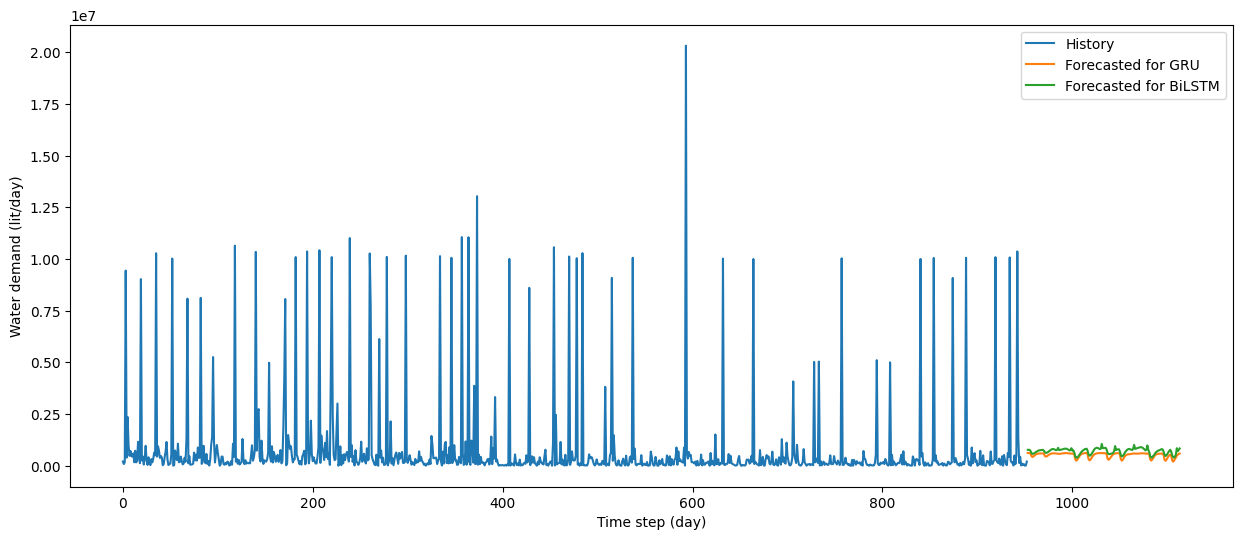

In [ ]:
# Plot history and future
def plot_multi_step(history, prediction1, prediction2):
    
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future = list(range(range_history, range_history +
                        len(prediction1)))    
    plt.plot(np.arange(range_history), np.array(history), 
             label='History')
    plt.plot(range_future, np.array(prediction1),
             label='Forecasted for GRU')
    plt.plot(range_future, np.array(prediction2),
             label='Forecasted for BiLSTM')
      
    plt.legend(loc='upper right')
    plt.xlabel('Time step (day)')
    plt.ylabel('Water demand (lit/day)')
        
plot_multi_step(normalized_df_outflow_b1, prediction_gru, prediction_bilstm)

In [ ]:
# df = normalized_df_outflow_b1
# df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
# df.set_index('TRANS_DATE', inplace=True)

# df.plot()
# plt.show()